In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
ss = "I am very lucky"

In [3]:
import re
def txt2sig_txt(ss):
    xx = [x for x in re.sub('[aeiouy ,-]','', ss.lower())]
    return list(dict.fromkeys(xx))

sig_chars = txt2sig_txt(ss='I am rich')

In [4]:
sig_chars

['m', 'r', 'c', 'h']

In [24]:
def ring(n=4,r=100,offset=0,closed=False):
    if closed: n += 1
    T = np.linspace(0,-2*np.pi,n,endpoint=closed) + np.radians(offset)
    return r*np.cos(T), r*np.sin(T)

def txt2path(sig_chars):
    def lets2pos():
        pts= []
        rs = [100,70,30]
        for n in [13, 8, 5]:
            tt = zip(* ring(n=n, r=rs.pop(0))) 
            pts.extend( list(tt))
        return dict(zip(string.ascii_lowercase, pts))
    
    pos =  lets2pos()
    return [ np.array(pos[x]) for x in sig_chars] 

In [15]:
all_pos = txt2path(string.ascii_lowercase)
np.save('char_pos',all_pos)

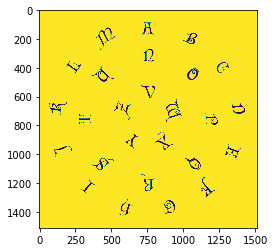

In [16]:
wheel = np.load('wheel.npy')
plt.imshow(wheel)



In [17]:
txt2path(sig_chars)

[array([88.54560257, 46.4723172 ]),
 array([-7.00000000e+01, -8.57252759e-15]),
 array([ 56.80647467, -82.29838659]),
 array([-97.09418174,  23.93156643])]

In [18]:
def ref(x, yy):
    # avoids a square root
    # reflection in the middle
    return x - 2*np.dot(x,yy)*yy/sum(yy*yy)

def t2line(pt,tt):
    x = np.zeros(3)
    x[:2] = tt[:2]
    x[2] = -np.dot(pt,tt)
    return x

t2vec = t2line

def a2b(a,b):
    plt.plot([a[0],b[0]], [a[1],b[1]])
    
def rot(tx = np.radians(30)):
    c, s = np.cos(tx), np.sin(tx)
    return np.array(((c, -s), (s, c)))

    
pts = np.zeros((2,len(X)))
pts[0] = X
pts[1] = Y
pts = pts.transpose()
N = np.array([-1,0])
def ab(a,b):
    plt.plot([a[0],b[0]], [a[1],b[1]])

for a,b in zip(pts[:-1], pts[1:]):
    
    ab(a,a+N)
    xx = np.cross( t2vec((b+a)/2, b-a ) , t2vec(a,N))
    xx = xx / xx[2]
    N = ref(N,a-b)
    R = np.linalg.norm(b - xx[:2])
    #print(np.linalg.norm(a - xx[:2]),np.linalg.norm(b - xx[:2]))
    aa, bb = ring(n=20,r=R)
    aa  = aa + xx[0]
    bb = bb + xx[1]
    plt.plot(aa, bb,'r')
    

NameError: name 'X' is not defined

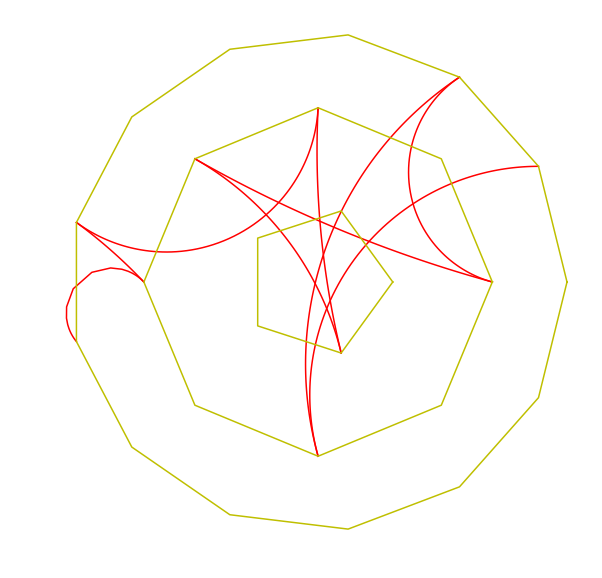

In [27]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off() 
ax.set_aspect('equal') 

fig.set_size_inches(10,10)

pts = txt2path(txt2sig_txt('my plans will pull through'))
N = np.array([1,0])

for a, b in zip(pts[:-1], pts[1:]):

    
    xx = np.cross( t2line((b+a)/2, b-a ) , t2line(a,N))
    CC = (xx / xx[2])[:2]
    R = np.linalg.norm(b - CC)
    # bit of a hack linearise and project
    T  = np.linspace(0,1,100)
    aa, bb = [], []
    for t in T:
        dd = (1-t)*a + t*b - CC
        #projection
        dd =  dd * R / np.linalg.norm(dd) + CC
        aa.append(dd[0])
        bb.append(dd[1])
    ax.plot(aa, bb,'r')
    N = ref(N,a-b)
    
rs = [100,70, 30]    
for n in [13, 8, 5]:
    X,Y = ring(n=n, r=rs.pop(0),closed=True)
    ax.plot(X,Y,'y')

2.7112417593601634 1.8074945062401107
10.973123976263407 7.315415984175604
12.191081963432348 8.127387975621563
7.326324394534426 4.8842162630229495
8.060173164228845 5.373448776152563
10.973123976263404 7.315415984175604


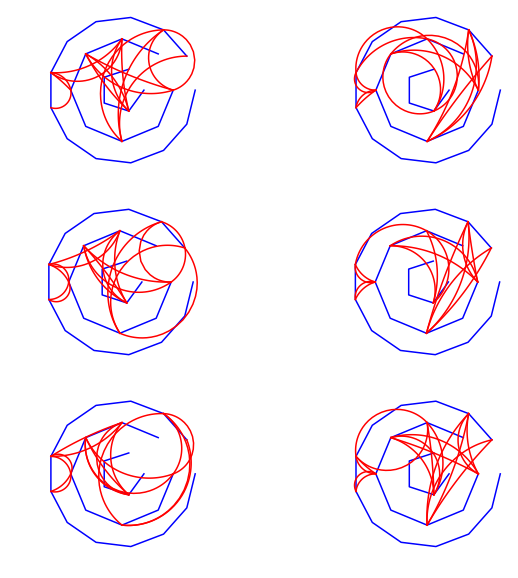

In [28]:


def mk_arcs( pts, N=np.array([-1,0])):
    length = np.linalg.norm
    arcs = []
    for a, b in zip(pts[:-1], pts[1:]):

        a2b =  b - a
        mid_pt = (b + a)/2
        xx = np.cross( t2line(mid_pt,a2b) , t2line(a,N))
        CC = (xx / xx[2])[:2]
        R = np.linalg.norm(a - CC)
        #reflect the tangent
        N = N - 2*np.dot(N, a2b)*a2b/sum(a2b*a2b)
        # bit of a hack linearise and project
        # failed if CC was on the segment
        # should maybe just drop the segment
        # tricky broadcasting
        
        threshold = length(b-a)/20
        dist = np.linalg.norm( CC - mid_pt)
   
            
        if dist <  threshold: 
            CC = mid_pt + 1.5*threshold*(CC - mid_pt)/dist
            R = np.linalg.norm(a - CC)
            print(np.linalg.norm( CC - mid_pt), threshold)
            #drop seg
            continue
            
            x, y = CC
            ax.plot([x],[y],'yo')
            M = np.ones((2,2))
            M[0] = a
            M[1] = b
            X,Y = M.transpose()
            ax.plot(X,Y,'g')  
        
        T  = np.linspace(0,1,50) 
            
        arc = T*a.reshape(-1,1) + (1-T)*b.reshape(-1,1)
        CC = CC.reshape(-1,1)
        arc = arc - CC
        dist = np.sqrt( (arc*arc).sum(axis=0)) 
        arcs.append(R*arc/dist + CC)
    return arcs

def show(pts, 
         N=np.array([1,0]),
         ax=plt):
    
    for aa in mk_arcs(pts, N):
        X,Y = aa
        ax.plot(X,Y,'r')

fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
axs = axs.ravel()

NS = np.array([ np.array([1,0]).dot(rot(t))
               for t in np.linspace(0,10,2)])

for ax in axs:
    ax.set_axis_off() 
    ax.set_aspect('equal') 
  
    for n,r  in zip([13, 8, 5],[100,70, 30]):
        X, Y = ring(n=n, r=r)
        ax.plot(X, Y ,'b')

    for NN in NS:
        show(pts,N=NN,ax= ax)
        
    NS = NS.dot(rot(30))
  

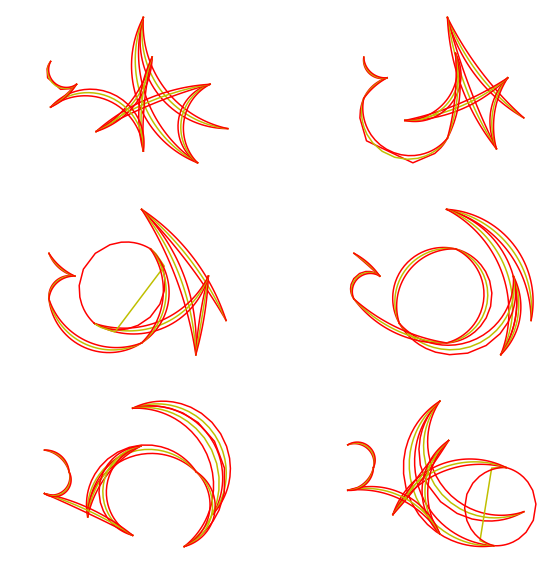

In [434]:
def rot(tx=30):
    tx = np.radians(tx)
    c, s = np.cos(tx), np.sin(tx)
    return np.array(((c, -s), (s, c)))

def mk_arc(a,b, N=np.array([-1,0])):
    length = np.linalg.norm
    a2b =  b - a
    mid_pt = (b + a)/2
    xx = np.cross( t2line(mid_pt, a2b) , t2line(a,N))
    CC = (xx / xx[2])[:2]
    R = np.linalg.norm(a - CC) 
            
    T  = np.linspace(0,1,50)     
    arc = T*a.reshape(-1,1) + (1-T)*b.reshape(-1,1)
    CC = CC.reshape(-1,1)
    arc = arc - CC
    dist = np.sqrt( (arc*arc).sum(axis=0)) 
    
    return R*arc/dist + CC

fig, axs = plt.subplots(3,2)
fig.set_size_inches(10,10)
axs = axs.ravel()
for ax in axs:
    ax.set_axis_off() 
    ax.set_aspect('equal') 
    
arcs = []
for ax, s in zip(axs, np.linspace(0,150,6)):
    N = rot(s)[0]
    for a, b in zip(pts[:-1], pts[1:]):
        cols = ['r','y','r']
        for t in np.linspace(0,12,3):
            arcs.append(mk_arc(a,b, N.dot(rot(t))))
            X,Y = arcs[-1]
            ax.plot(X,Y, cols.pop())
        a2b = b - a
        N = N - 2*np.dot(N, a2b)*a2b/sum(a2b*a2b)


In [433]:
ss = 'I have a wonderful life'
ss = "I feel loved and cared for"
ss = "I catch my connecting flight on time"
ss = "My plans will pull through"
#ss = 'I have a wonderful life'
#this is global
pts = txt2path(txt2sig_txt(ss))
txt2sig_txt(ss)

['m', 'p', 'l', 'n', 's', 'w', 't', 'h', 'r', 'g']

In [251]:
np.array(NS).dot(rot).dot(rot)

array([[0.5       , 0.8660254 ],
       [0.41339746, 0.9160254 ],
       [0.32679492, 0.9660254 ]])

In [142]:
pwd

'/home/gregmcshane'

In [217]:
sss[1]

'mbsrwlf'

In [144]:
import pandas as pd

In [151]:
df = pd.read_excel("./sigils.xlsx", skiprows=2)

In [440]:
sss[:10]

['mntbsv',
 'mbsrwlf',
 'mfrnxt',
 'dntpc',
 'mcl',
 'mndscl',
 'wlstrf',
 'brthdpl',
 'mnctrl',
 'blnc']

In [298]:
sigs = [''.join(txt2sig_txt(x)) for x in phrases]
sss = [x for x in sigs if len(x) < 8]

jj = " ".join(sss)
ww = [jj[i:i+3] for i in range(len(jj)-3)]
ww = [x for x in ww if ' ' not in x]

In [300]:
from collections import Counter

In [301]:
ll = Counter(ww)

In [304]:
ll.most_common()

[('mdv', 24),
 ('dvt', 24),
 ('dnt', 23),
 ('ths', 15),
 ('mnt', 14),
 ('cnt', 12),
 ('ntd', 10),
 ('mfr', 9),
 ('mcn', 9),
 ('sth', 8),
 ('vth', 8),
 ('nts', 8),
 ('mpr', 8),
 ('fnd', 7),
 ('thn', 7),
 ('wth', 7),
 ('rst', 7),
 ('ntp', 6),
 ('wls', 6),
 ('str', 6),
 ('mfl', 6),
 ('ntg', 6),
 ('trs', 6),
 ('thr', 6),
 ('mth', 6),
 ('ntl', 6),
 ('mst', 6),
 ('prs', 6),
 ('wln', 6),
 ('msr', 6),
 ('msc', 6),
 ('nds', 5),
 ('dwl', 5),
 ('tpr', 5),
 ('prn', 5),
 ('thg', 5),
 ('ntf', 5),
 ('prt', 5),
 ('vtr', 5),
 ('ndr', 5),
 ('ntc', 5),
 ('ntb', 4),
 ('mbs', 4),
 ('scl', 4),
 ('rth', 4),
 ('kns', 4),
 ('rmn', 4),
 ('hpr', 4),
 ('gth', 4),
 ('trn', 4),
 ('spc', 4),
 ('cnd', 4),
 ('prd', 4),
 ('tfr', 4),
 ('vtn', 4),
 ('lng', 4),
 ('thc', 4),
 ('dsr', 4),
 ('nwt', 4),
 ('fls', 4),
 ('mgr', 4),
 ('flw', 4),
 ('nth', 4),
 ('tfl', 4),
 ('rnd', 4),
 ('tbs', 3),
 ('mnd', 3),
 ('mnc', 3),
 ('ctr', 3),
 ('trl', 3),
 ('mkn', 3),
 ('nst', 3),
 ('thp', 3),
 ('hpn', 3),
 ('hvg', 3),
 ('vgd', 3),
 ('mg

In [322]:
ll.most_common()[:20]

[('mdv', 24),
 ('dvt', 24),
 ('dnt', 23),
 ('ths', 15),
 ('mnt', 14),
 ('cnt', 12),
 ('ntd', 10),
 ('mfr', 9),
 ('mcn', 9),
 ('sth', 8),
 ('vth', 8),
 ('nts', 8),
 ('mpr', 8),
 ('fnd', 7),
 ('thn', 7),
 ('wth', 7),
 ('rst', 7),
 ('ntp', 6),
 ('wls', 6),
 ('str', 6)]

In [323]:
for x,y in hashed:
    if 'wth' not in x: continue
    print(y)

I deal with customer bullshit calmly and easily
I drive skillfully and with awareness
I deal with difficult situations easily and successfully
Dionysus is always with me
I am aligned with Ganesha
Voden is with me
Yarbog is with me
I am one with the hunt
I am responsible with the baby, it is safe in my care
My plans will pull through
I move easily and without pain
My pineal gland opens quickly and with ease
My period comes without cramps
I am one with the Force, it flows through me
I see and feel my soulbonds with ease
My soulbonds and I become co-conscious with ease
I am one with the sun, moon, and sea
I am one with the darkness
I am one with the light
My aura and soul are one with the wind
I bond with my tarot deck
I memorize my lines with ease
I am filled with light
I clean without panicking
Fuck off (made with Desert Runes alphabet)
I am with my Twin Flame
I am dealing with my break up well
My love is with you
I keep up with all my classes without my mental problems getting in the w

In [305]:
hashed = [(''.join(txt2sig_txt(x)),x) for x in phrases]

In [405]:
data = ' '.join(phrases).lower()

In [441]:
stop = '''with will have from this does what through 
when into without while they
over that time need than their'''

voc = [ x for x in txt.split() 
       if len(x) > 3 and x not in stop]
pp = Counter(voc)

In [432]:
pp.most_common()[:100]

[('strong', 61),
 ('free', 47),
 ('safe', 44),
 ('protected', 42),
 ('love', 40),
 ('find', 38),
 ('good', 36),
 ('well', 35),
 ('life', 35),
 ('relationship', 35),
 ('ease', 33),
 ('easily', 32),
 ('quickly', 30),
 ('devoted', 29),
 ('others', 28),
 ('healthy', 26),
 ('myself', 25),
 ('work', 24),
 ('energy', 23),
 ('happy', 23),
 ('family', 22),
 ('make', 21),
 ('control', 19),
 ('people', 19),
 ('connected', 19),
 ('body', 19),
 ('communicate', 18),
 ('feel', 18),
 ('place', 17),
 ('harm', 16),
 ('home', 16),
 ('remember', 15),
 ('spirits', 15),
 ('always', 14),
 ('friends', 14),
 ('past', 13),
 ('want', 13),
 ('full', 13),
 ('peace', 13),
 ('more', 13),
 ('dreams', 12),
 ('negative', 12),
 ('remain', 12),
 ('better', 12),
 ('appear', 12),
 ('luck', 12),
 ('courage', 12),
 ('pain', 12),
 ('loved', 12),
 ('know', 11),
 ('calm', 11),
 ('stay', 11),
 ('soon', 11),
 ('perfect', 11),
 ('clear', 11),
 ('year', 11),
 ('every', 11),
 ('things', 11),
 ('confident', 11),
 ('understand', 11),


In [429]:
' '.join([x for x,y in pp.most_common()[20:80] ])

'family make control people connected body communicate feel place harm home remember spirits always friends past want full peace more dreams negative remain better appear luck courage pain loved know calm stay soon perfect clear year every things confident understand energies person anxiety emotions accepted house relationships keep stop their ones hurt positive great help play long pass beautiful flows'

In [418]:
'with will have from this does what through  when'

'with will have from this strong free safe protected love find good well life relationship ease easily quickly devoted others'